In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
train.head(3)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656


In [4]:
test = pd.read_csv('test.csv')
test.head(3)

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262


In [5]:
train.shape

(700, 2)

In [6]:
test.shape

(300, 2)

In [7]:
train.dtypes

x    float64
y    float64
dtype: object

In [8]:
test.dtypes

x      int64
y    float64
dtype: object

In [9]:
train.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [10]:
test.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


In [11]:
train.isnull().sum()

x    0
y    1
dtype: int64

In [12]:
train.dropna(inplace=True)

In [13]:
test.isnull().sum()

x    0
y    0
dtype: int64

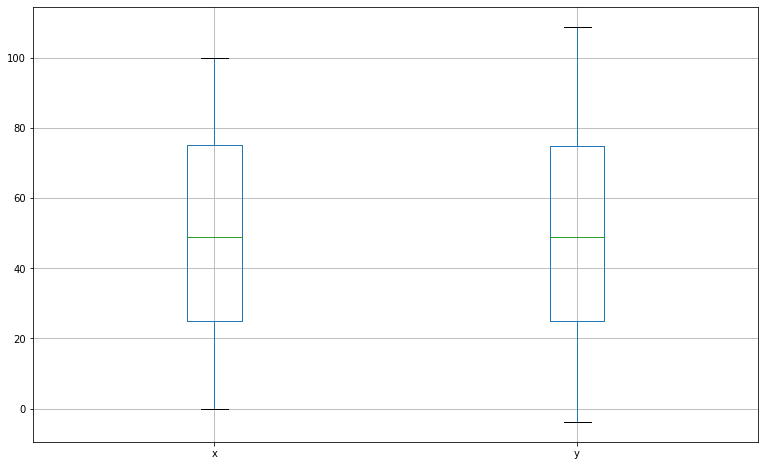

In [14]:
plt.rcParams['figure.figsize'] = (13,8)
train.boxplot()
plt.show()

In [15]:
X_train = train.loc[:, "x"].values.reshape(-1,1)
y_train = train["y"].values.reshape(-1,1)
X_test = test.loc[:, "x"].values.reshape(-1,1)
y_test = test["y"].values.reshape(-1,1)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(699, 1) (699, 1)
(300, 1) (300, 1)


In [16]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [17]:
# let's try different regression models and check which is the best for our data

In [18]:
# linear regression using statsmodels

In [19]:
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [20]:
X_train_dummy = sm.add_constant(X_train_scaled)
X_test_dummy = sm.add_constant(X_test_scaled)

In [21]:
X_train_dummy.shape

(699, 2)

In [22]:
linreg = sm.OLS(y_train, X_train_dummy).fit()
print(linreg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 7.426e+04
Date:                Sun, 26 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:17:43   Log-Likelihood:                -1712.8
No. Observations:                 699   AIC:                             3430.
Df Residuals:                     697   BIC:                             3439.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.9399      0.106    470.044      0.0

In [23]:
# This model explains 99.1% of the variation , and since we have only 1 feature we don't have multicollinearity or autocorellation.

In [24]:
predicted = linreg.predict(X_test_dummy)
actual = y_test

In [26]:
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import accuracy_score
linreg_rmse = rmse(actual, predicted)

In [27]:
score_card = pd.DataFrame(columns=['Model_Name', 'RMSE','Accuracy'])

In [28]:
linreg_metrics = pd.Series({
                     'Model_Name': "Linrear regression using statsmodels",
                     'RMSE':linreg_rmse.mean(),
                     'Accuracy':91.1     
                   })
score_card = score_card.append(linreg_metrics, ignore_index=True)
score_card

,Model_Name,RMSE,Accuracy
0,Linrear regression using statsmodels,39.637536,91.1


In [29]:
# linear regression model using sklearn

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [31]:
y_pred = regressor.predict(X_test_scaled)

In [32]:
predicted = y_pred
actual = y_test

In [33]:
linreg2_rmse = rmse(actual, predicted)

In [34]:
acc = regressor.score(X_test_scaled,y_test)
print(acc)

0.9888014444327563


In [35]:
linreg2_metrics = pd.Series({
                     'Model_Name': "Linrear regression using Sklearn",
                     'RMSE':linreg2_rmse.mean(),
                     'Accuracy': acc   
                   })
score_card = score_card.append(linreg2_metrics, ignore_index=True)
score_card

,Model_Name,RMSE,Accuracy
0,Linrear regression using statsmodels,39.637536,91.100000
1,Linrear regression using Sklearn,3.071306,0.988801


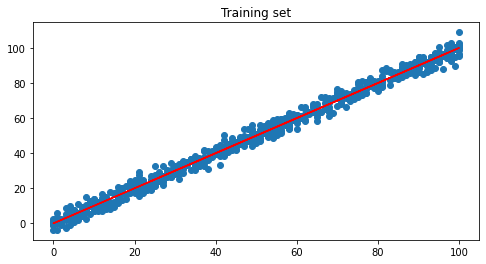

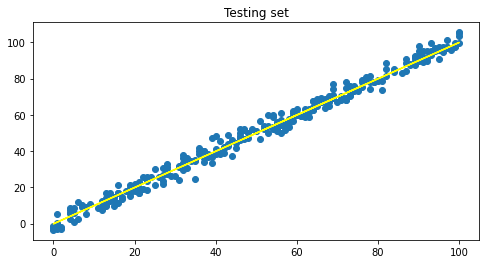

In [36]:
plt.figure(figsize=(8,4))
plt.title("Training set")
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train_scaled), c='red')

plt.figure(figsize=(8,4))
plt.title("Testing set")
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test_scaled), c='yellow')

In [37]:
# Decision tree regression

In [38]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 42)
regressor.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [39]:
y_pred = regressor.predict(X_test_scaled)

In [40]:
predicted = y_pred
actual = y_test

In [41]:
dtr_rmse = rmse(actual, predicted)

In [42]:
acc = regressor.score(X_test_scaled,y_test)
print(acc)

0.9871681731403525


In [43]:
dtr_metrics = pd.Series({
                     'Model_Name': "Decision Tree Regressor",
                     'RMSE':dtr_rmse.mean(),
                     'Accuracy': acc   
                   })
score_card = score_card.append(dtr_metrics, ignore_index=True)
score_card

,Model_Name,RMSE,Accuracy
0,Linrear regression using statsmodels,39.637536,91.100000
1,Linrear regression using Sklearn,3.071306,0.988801
2,Decision Tree Regressor,39.641234,0.987168


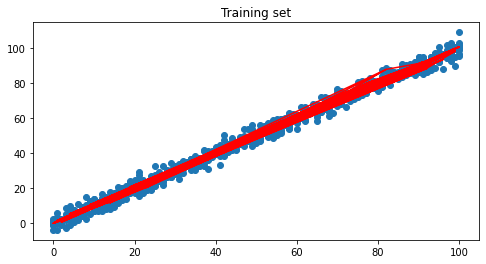

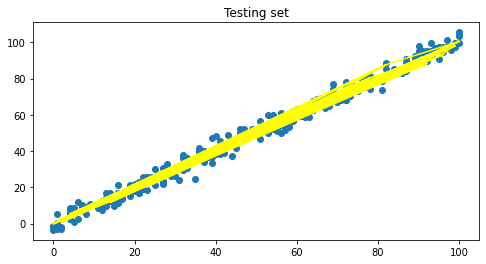

In [44]:
plt.figure(figsize=(8,4))
plt.title("Training set")
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train_scaled), c='red')

plt.figure(figsize=(8,4))
plt.title("Testing set")
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test_scaled), c='yellow')

In [45]:
# Random forest regression

In [46]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressor.fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(random_state=42)

In [47]:
y_pred = regressor.predict(X_test_scaled)

In [48]:
predicted = y_pred
actual = y_test

In [49]:
rfr_rmse = rmse(actual, predicted)

In [50]:
acc = regressor.score(X_test_scaled,y_test)

In [51]:
rfr_metrics = pd.Series({
                     'Model_Name': "Decision Tree Regressor",
                     'RMSE':rfr_rmse.mean(),
                     'Accuracy': acc   
                   })
score_card = score_card.append(rfr_metrics, ignore_index=True)
score_card

,Model_Name,RMSE,Accuracy
0,Linrear regression using statsmodels,39.637536,91.100000
1,Linrear regression using Sklearn,3.071306,0.988801
2,Decision Tree Regressor,39.641234,0.987168
3,Decision Tree Regressor,39.642710,0.987181


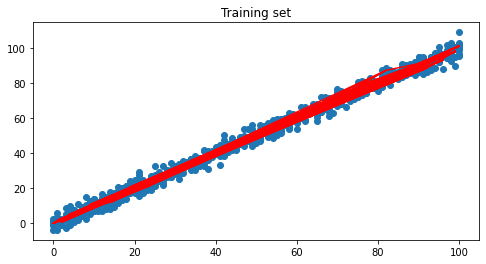

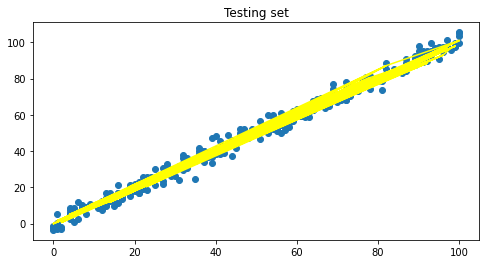

In [52]:
plt.figure(figsize=(8,4))
plt.title("Training set")
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train_scaled), c='red')

plt.figure(figsize=(8,4))
plt.title("Testing set")
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test_scaled), c='yellow')

In [55]:
score_card

,Model_Name,RMSE,Accuracy
0,Linrear regression using statsmodels,39.637536,91.100000
1,Linrear regression using Sklearn,3.071306,0.988801
2,Decision Tree Regressor,39.641234,0.987168
3,Decision Tree Regressor,39.642710,0.987181


In [56]:
# Linrear regression using Sklearn was the best model for our dataset.